### Exercise 4

#### 1.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series
%matplotlib inline
import scipy.stats as stats

In [2]:
data = pd.read_csv('msft.csv')

#### 2.

##### a)

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/30/2016,62.959999,62.990002,62.029999,62.139999,25465900,62.139999
1,12/29/2016,62.860001,63.200001,62.730000,62.900002,10181600,62.900002
2,12/28/2016,63.400002,63.400002,62.830002,62.990002,14247400,62.990002
3,12/27/2016,63.209999,64.070000,63.209999,63.279999,11583900,63.279999
4,12/23/2016,63.450001,63.540001,62.799999,63.240002,12398000,63.240002


##### b)

In [4]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000
mean,33.980318,34.312530,33.654591,33.993987,5.296776e+07,30.456126
std,10.536277,10.589226,10.491077,10.549777,2.908349e+07,11.711547
min,15.200000,15.620000,14.870000,15.150000,8.370500e+06,12.381153
25%,26.760000,27.000000,26.480000,26.770000,3.370250e+07,22.349302
50%,29.969999,30.219999,29.730000,29.980000,4.754195e+07,25.306450
75%,41.369999,41.682499,41.040001,41.475000,6.389458e+07,39.035395
max,63.840000,64.099998,63.410000,63.619999,3.193179e+08,63.619999


##### c)

In [5]:
closing = data['Close']
closing

0       62.139999
1       62.900002
2       62.990002
3       63.279999
4       63.240002
          ...    
2513    29.959999
2514    29.930000
2515    29.639999
2516    29.809999
2517    29.860001
Name: Close, Length: 2518, dtype: float64

##### d)

In [6]:
cdate = data['Date'].values
cdate = cdate[1:]
N = closing.size
change = closing[:N-1].values-closing[1:].values
changeData = Series(change, index=cdate)
changeData.head()

12/29/2016   -0.760003
12/28/2016   -0.090000
12/27/2016   -0.289997
12/23/2016    0.039997
12/22/2016   -0.309997
dtype: float64

##### e)

<AxesSubplot:>

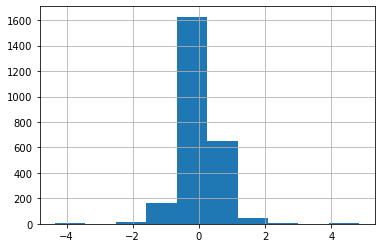

In [7]:
changeData.hist()

##### f)

In [8]:
zscores = stats.zscore(changeData)
msk = [ l for l in zscores if l>4]
print (msk)

[4.228494198687093, 4.951713183549201, 5.322140655749363, 8.514889645552804, 7.9680637710985485, 4.14029852545753, 7.033172700957248, 5.339780143185015]


##### g)

In [9]:
zscores = stats.zscore(changeData)
msk = [ l for l in zscores if l<-4]
print (msk)

[-7.078417247571804, -4.591249519143552, -7.695795779922474, -7.1489734333657085, -4.026782393304911, -4.238459770430326]


#### 3.

##### a) EQUAL WIDTH 

In [10]:
bins = pd.cut(closing,5)
bins.head()

0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] < (44.232, 53.926] < (53.926, 63.62]]

##### b) EQUAL FREQUENCY

In [11]:
bins = pd.qcut(closing,[0,0.25,0.5,0.75,1])
bins.head()

0    (41.475, 63.62]
1    (41.475, 63.62]
2    (41.475, 63.62]
3    (41.475, 63.62]
4    (41.475, 63.62]
Name: Close, dtype: category
Categories (4, interval[float64]): [(15.149000000000001, 26.77] < (26.77, 29.98] < (29.98, 41.475] < (41.475, 63.62]]